# Mean
Throughout this course we'll learn to summarize the distribution of a variable with a single value. Depending on the particular characteristics of a distribution, we'll see that we can summarize it using the **mean, the weighted mean, the median, or the mode**.

We'll also learn to measure the **variability in a distribution**. If we have a distribution A with the values [3, 3, 3, 3], and a distribution B with [30, 1, 15, 43], we can clearly see that there's much more variability (diversity) in B. We'll learn to quantify variability using measures like **variance and standard deviation**.

Once we understand the measures of variability, we can then learn how to locate a value in a distribution, and determine how it compares to other values. For instance, when we analyze salaries, we might want to find out whether a salary of $75000 is common or extreme inside a company. We'll learn to answer this question with precision using a **z-score**.

In [1]:
distribution = [0,1,4,7,8,10]

In [2]:
mean = (0+1+4+7+8+10) / 6
mean

When we compute the summary value of a distribution in this way, we call the value the **arithmetic mean**, or the **mean**. For our distribution above, the mean is 5.

Although the distance for each individual value varies, the sum of the distances of the values that are below the mean is equal to the sum of the distances of the values that are above the mean:

## Task
Generate 5000 different distributions, measure the total distances above and below the mean, and check whether they are equal. For each of the 5000 iterations of a for loop:

In [3]:
from numpy.random import randint, seed

In [4]:
equal_distances = 0
for i in range(5000):
    seed(i) # have no idea what does it mean
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1
equal_distances

5000

In [5]:
import pandas as pd
house = pd.read_csv(r'/users/shahsuvarli/desktop/AmesHousing_1.txt', sep='\t')
house.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
house['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
house['SalePrice'].mean()

180796.0600682594

## Compute the mean of the SalePrice variable. We'll assume that the data we have is a population relative to the question "What's the mean sale price of a house in Ames, Iowa for the period 2006-2010?".

In [8]:
sample_size_list = []
sampling_error_list = []
sample_size = 5
for i in range(101):
    sample = house['SalePrice'].sample(sample_size, random_state=i)
    sampling_error = house['SalePrice'].mean() - sample.mean()
    sample_size_list.append(sample_size)
    sampling_error_list.append(sampling_error)
    sample_size += 29
    
import matplotlib.pyplot as plt
plt.scatter(x=sample_size_list, y=sampling_error_list)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')
plt.show()

<Figure size 640x480 with 1 Axes>

We've seen in the previous exercise that the general tendency for the sampling error is to decrease as the sample size increases. This tendency, however, has exceptions. For instance, there are cases where small sample sizes (100-500 sample points) gave us better estimates for the population mean **m (' Greek mew')** than large sample sizes (2500 sample points or more) did.

For any given sample size, we can have many combinations of values. For instance, for a sample size of 3, we can have many possible combinations of sale prices: [220000, 143000, 281000], [123600, 209500, 202665], [287000, 142500, 440000], etc. Most of the samples of size 3 will give a good estimate of the population mean mew. To prove this point, in the code below we will:

* Measure the mean for 10000 samples of size 3.
* Use a histogram to visualize the distribution of the sample means.
* Draw a vertical line corresponding to the population mean

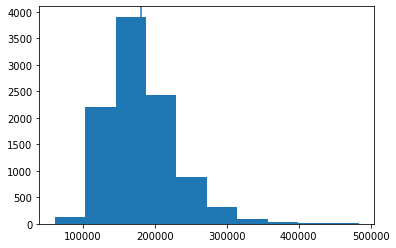

In [9]:
means = []
for i in range(10000):
    sample = house['SalePrice'].sample(3, random_state=i)
    means.append(sample.mean())
    
plt.hist(means)
plt.axvline(house['SalePrice'].mean())

We can see that most sample means cluster around the population mean. This means that when we take a sample of size 3 and compute x-bar, we have fairly good chances to get a good estimate for the population mean mew. This explains what we've seen in the scatter plot above, where we got good estimates from low-sized samples.

It's also worth noting that the mean of the 10000 samples' means we computed is very close to the population's mean mew:

In [10]:
sum(means) / len(means)

180824.7253000002

In [11]:
house['SalePrice'].mean()

180796.0600682594

## Take 10000 samples of sample size 100 from the population of sale prices and measure the mean of each sample. For each of the 10000 iterations of a for loop:

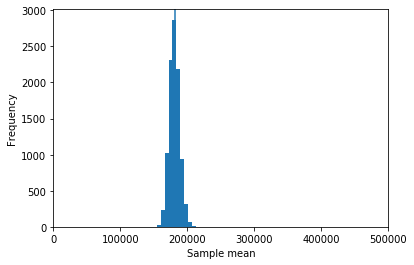

In [12]:
means = []

for i in range(10000):
    sample = house['SalePrice'].sample(100, random_state=i)
    means.append(sample.mean())
    
plt.hist(means)
plt.axvline(house['SalePrice'].mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)
plt.show()

Generally, as we increase the sample size, there will be less and less variability around the population mean. If there's less variability, there are less chances to get a poor estimate for the population mean — the worst sample means we can get are fairly close to the population mean, which is good.

# Weighed mean

When we take into account the different weights and compute the mean like we did in the previous exercise, we call that mean the **weighted mean**. Just as the arithmetic mean we learned about in the previous mission, the weighted mean can be easily defined algebraically.

In [13]:
year = [2006,2007,2008,2009,2010]
mean_prices = [181761.648000,185138.207493,178841.750804,181404.567901,172597.598240]
houses_sold = [625,694,622,648,341]
houses = pd.DataFrame()
houses['Year'] = year
houses['Mean Price'] = mean_prices
houses['Houses Sold'] = houses_sold
houses

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [14]:
houses['Sums per year'] = houses['Mean Price']*houses['Houses Sold']
houses

,Year,Mean Price,Houses Sold,Sums per year
0,2006,181761.648000,625,1.136010e+08
1,2007,185138.207493,694,1.284859e+08
2,2008,178841.750804,622,1.112396e+08
3,2009,181404.567901,648,1.175502e+08
4,2010,172597.598240,341,5.885578e+07


In [15]:
weighted_mean = houses['Sums per year'].sum() / houses['Houses Sold'].sum()
int(weighted_mean)

180796

In [16]:
original_mean = house['SalePrice'].mean()
int(original_mean)

180796

In [17]:
difference = int(weighted_mean) - int(original_mean)
difference

0

While learning about the weighted mean we saw that there are distributions where it's possible to compute the mean, although that wouldn't be correct. There are distributions, however, where it's impossible to compute the mean. Consider for instance the frequency distribution of the **TotRms AbvGrd** variable, which describes the number of rooms above ground:

In [18]:
house['TotRms AbvGrd'].value_counts()

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64

The lowest boundary of the distribution is well-defined — the lowest value is 2 and no value in the distribution can be lower than that. But the upper boundary is not defined as precisely — the highest value is "10 or more" which means that houses can actually have 10, 11, 15, or even more rooms. The upper boundary ("10 or more") is thus open, and for this reason we say that the TotRms AbvGrd variable has an **open-ended distribution**.

# Median

A common workaround is to sort all the values in the distribution in an ascending order and then select the middle value as the most representative value of the distribution. Consider this sample of 5 values from the TomRms AbvGrd column:

In [19]:
['10 or more',5,7,7,6]

['10 or more', 5, 7, 7, 6]

First, we need to order the values in an ascending order:

In [20]:
[5,6,7,7,'10 or more']

[5, 6, 7, 7, '10 or more']

This distribution has five values and the middle one is the third one because it divides the distribution in two halves of equal length. The third value is 7, and the two resulting halves are [5,6] and [7,'10 or more']. We call this middle value the **median**, so for this case the median is **7**.

When a distribution has an even number of values, it's not clear which is the middle one. Consider this sorted distribution with 6 values:

In [21]:
[5,6,7,7,8,'10 or more']

[5, 6, 7, 7, 8, '10 or more']

It's impossible to choose a value from this distribution that divides the distribution in two halves of equal length. The workaround is to take the two middle values and compute their mean. The two middle values are [7,7], and the two resulting halves are:[5,6] and [8,'10 or more'].

The median is the mean of the two middle values, that is
## (7+7)/2 = 7

This value of 7 is the average value of the distribution above. In statistics, the term "average" refers to the most representative value of a distribution. Although it's common to use "average" and "mean" interchangeably, "average" is not restricted to refer only to the mean. Depending on the context, it can also refer to the median or the mode.

## Find the median value of the TotRms AbvGrd column.

In [22]:
house_copy = house.copy()
rooms = house_copy['TotRms AbvGrd'].replace('10 or more',10).astype(int).sort_values()

rooms.median()

6.0

When we compute the mean, we account equally for each value in the distribution — we sum up all the values in the distribution and then divide the total by the number of values we added. When we compute the median, however, we don't consider equally each value in the distribution. In fact, we only consider the middle value (or the middle two values). 

This property makes the median more resistant to changes in the data compared to the mean. Let's consider this simple distribution:

### [2,3,5,5,10]

Both the median and the mean of this distribution are 5. Let's change the last value in the distribution from 10 to 1000:

### [2,3,5,5,1000]

The median is still 5, but the mean is now 203. This is because the mean takes into account every value in the distribution, while the median considers only the middle value. Because the median is so resistant to changes in the data, it's classified as a **resistant** or **robust statistic**.

In this mission, we learned about the weighted mean and the median. We saw that for some distributions computing the mean is possible but incorrect. As an alternative, we learned about the weighted mean.

We saw that it's impossible to compute the mean for open-ended distributions and introduced the median as an alternative. For ordinal data, if we encode the attributes with numbers it becomes possible to compute the mean, but this is contentious and raises theoretical issues.

# Mode
We learned that the mean takes into account each value in the distribution, and we saw that it's fairly easy to define the mean algebraically. These two properties make the mean far superior to the median. The median comes in handy, however, when it's not possible or appropriate to compute the mean.

In this mission we'll explore a couple of cases where neither the mean nor the median are suitable for finding an average value, and we'll learn an alternative summary metric.

We'll still be working with the same data set on house sale prices that we used in the last two missions:

In [23]:
house['Land Slope'].value_counts() # Ordinal scale of measurement - Gtl-gentle, Mod-moderate, Sev-Severe

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

If we sort the values of the Land Slope variable, we can find that the middle two values are ['Gtl', 'Gtl'] (the variable has an even number of values). Although we can't take their mean, it's intuitively clear that the average of two identical values is one of those values, so the median value should be 'Gtl'.

However, if the two middle values were ['Gtl', 'Mod'], then it wouldn't be clear at all what to choose for the median. In cases like this, one workaround for finding an average value is to measure the most frequent value in the distribution. For the Land Slope variable, we can see that the value 'Gtl' has the **greatest frequency**:

We call the most frequent value in the distribution the **mode**. So the mode of the Land Slope variable is 'Gtl'. In other words, the typical house has a gentle slope. Very importantly, notice that the mode is the most frequent value in the distribution, not the frequency of that value — so the **mode is 'Gtl'**, not 2789.

In [24]:
house['Land Slope'].mode()

0    Gtl
dtype: object

In the previous screen, we learned that the mode is ideal for **ordinal data** represented using words. The mode is also a good choice for **nominal data**. Let's consider the Roof Style variable, which is measured on a nominal scale and describes the roof type of a house:

In [25]:
house['Roof Style'].value_counts() # Nominal value

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

In [26]:
house['Roof Style'].mode()

0    Gable
dtype: object

There are some cases where computing the mean and the median is possible and correct, but the mode is preferred nonetheless. This is sometimes the case for **discrete variables**.

To remind you from the first course, variables measured on interval or ratio scales can also be classified as discrete or continuous. A variable is discrete if there's no possible intermediate value between any two adjacent values. Let's take for instance the Kitchen AbvGr variable, which describes the number of kitchens in a house:

In [27]:
house['Kitchen AbvGr'].value_counts().sort_index()

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64

Let's say we need to write an article about the house market in Ames, Iowa, and our main target audience are regular adult citizens from Ames. Among other aspects, we want to describe how many kitchens the typical house has. If we take the mean, we'd need to write that the typical house has 1.04 kitchens. This wouldn't make much sense for the regular reader, who expects the number of kitchens to be a whole number, not a decimal.

The median is 1 — a value much easier to grasp by non-technical people compared to 1.04. But this is a lucky case because the middle two values in the sorted distribution could have been [1,2], and then the median would have been 1.5. The mode is a safer choice for cases like this because it guarantees a whole number from the distribution.

The mode of the Kitchen AbvGr variable is 1. When we report this result, we should avoid technical jargon (like "mode" or "variable") and simply say that the **typical house on the market has one kitchen**

The mean and the median generally summarize the distribution of a discrete variable much better than the mode, and you should use the mode only if you need to communicate your results to a non-technical audience.

There are distributions that can have more than one mode. Let's say we sampled the Kitchen AbvGr column and got this distribution of eight sample points:

### [0,1,1,1,2,2,2,3]

The two most frequent values are 1 and 2 (both occur in the distribution three times), which means that this distribution has two modes (1 and 2). For this reason, we call this distribution bimodal (the prefix "bi-" means "twice"). If the distribution had only one mode, we'd call it unimodal (the prefix "uni-" means "only one").

There's nothing wrong with having two modes. For our case above, the two modes tell us that the **typical house on the market has either one or two kitchens**.

It's not excluded to have a distribution with more than two modes. Let's say we sampled from another column, Bedroom AbvGr, and got this distribution of 10 sample points:

### [0,1,1,2,2,3,3,4,4,5]

Note that this distribution has four modes: 1, 2, 3, and 4 (each occurs twice in the distribution). When a distribution has more than two modes, we say that the distribution is **multimodal** (the prefix "multi-" means many).

We can also have cases when there is no mode at all. Let's say we sample again from the Bedroom AbvGr column and get this distribution of 8 sample points:

### [1,1,2,2,3,3,4,4]

Each unique value occurs twice in the distribution above, so there's no value (or values) that occurs more often than others. For this reason, **this distribution doesn't have a mode**. Contextually, we could say that there's no typical house on the market with respect to the number of bedrooms.

Distributions without a mode are often specific to continuous variables. It's quite rare to find two identical values in a continuous distribution (especially if we have decimal numbers), so the frequency of each unique value is usually 1. Even if we find identical values, their frequency is very likely to be too low to produce a meaningful mode value.

The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with the highest frequency. This method has its limitations, but it generally gives reasonable answers. Let's try to get a better grasp of how this works in the following exercise.

In [28]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in house['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)
mode = 150000
mean = house['SalePrice'].mean()
median = house['SalePrice'].median()

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


When we plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution. In the code below, we plot a kernel density plot to visualize the shape of the SalePrice variable and:

* Set the limits of the x-axis using the xlim parameter — the lowest limit is the minimum value in the SalePrice variable, and the upper limit is the maximum value.
* Plot a vertical line to indicate the position of the mode (note that our estimate of 150000 from the last exercise is quite close to the peak of the distribution).

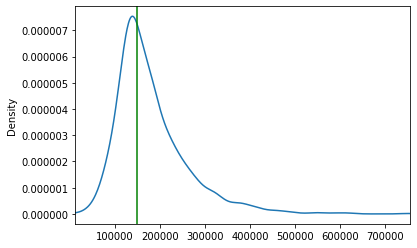

In [29]:
house['SalePrice'].plot.kde(xlim = (house['SalePrice'].min(),house['SalePrice'].max()))

import matplotlib.pyplot as plt
plt.axvline(150000, color = 'Green')

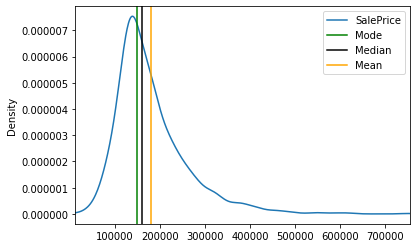

In [30]:
house['SalePrice'].plot.kde(xlim = (house['SalePrice'].min(),house['SalePrice'].max()))
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(house['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(house['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

For a left-skewed distribution, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode. This is obvious on the distribution of the Year Built variable:

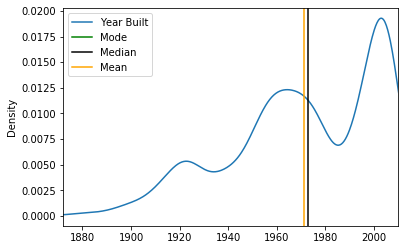

In [31]:
house['Year Built'].plot.kde(xlim = (house['Year Built'].min(),house['Year Built'].max()))
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(house['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(house['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

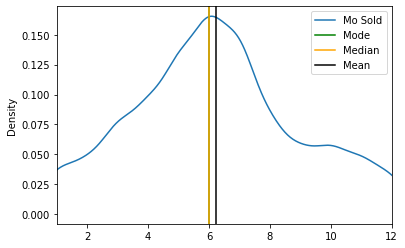

In [32]:
house['Mo Sold'].plot.kde(xlim = [1,12])

import matplotlib.pyplot as plt
plt.axvline(house['Mo Sold'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(house['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(house['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()

In this mission, we learned that the mode is ideal for summarizing:

* Ordinal data represented using words.
* Nominal data.
* Discrete data (when the average value needs to be communicated to a non-technical audience).

We also saw that the position of the mean, median, and mode is generally predictable for skewed and symmetrical distributions.

# Measures of variability

There are many ways we can measure the variability of a distribution. These are some of the measures we can use:
* The range.
* The mean absolute deviation.
* The variance.
* The standard deviation.

To solve this problem, we can take the absolute value of each distance, and then sum up the absolute values. The **absolute value** (also called **modulus**) of a number is the positive version of that number, regardless of its sign. For instance, the absolute value of -7 is +7, and the absolute value of +7 is +7. In mathematical notation we write:

### |-7| = +7
### |+7| = +7


We'll update the formula used previously to reflect the fact the we're summing up the absolute distances instead:

### mean absolute distance = (|x1-mean|+|x2-mean|+...+|xN-mean|) / N

We call this measure of variability **mean absolute distance**. In statistical jargon, however, the distance of a value from the mean is called **deviation**. So the mean absolute distance is more commonly known as **mean absolute deviation** or **average absolute deviation**.

Let's take the mean absolute deviation of distribution C and see whether this metric does better than the range. Remember that the range is 20, but we expect a smaller value (which is greater than 0 at the same time).

In [33]:
C = [1,1,1,1,1,1,1,1,1,21]
def mean_absolute_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        absolute_distance = abs(value - reference_point)
        distances.append(absolute_distance)
        
    return sum(distances) / len(distances)

mad = mean_absolute_deviation(C)
mad

3.6

In the previous screen we transformed the distances to absolute values to avoid having the sum of distances amount to 0 in the numerator. Another way to solve this problem is to square each distance and then find the mean of all the squared distances:

**mean squared distance = ((x1-mean)2+(x2-mean)2+...+(xN-mean)2) / N**

This measure of variability is sometimes called **mean squared distance** or **mean squared deviation** (remember that "distance" and "deviation" are synonymous in this context). However, it's more commonly known as **variance**.

Squaring the distances or taking their absolute values ensure that we get a variability value that is greater than 0 for all distributions that show some variability. Notice, however, that variance and mean absolute deviation will still be 0 for distributions that show no variability.

Consider distribution D=[2,2,2], which has a variance and a mean absolute deviation of 0:

#### variance = ((2-2)**2+(2-2)**2+(2-2)**2) / 3 = 0

#### mean absolute deviation = (|2-2|+|2-2|+|2-2|) / 3 = (0+0+0)/3 = 0

In the previous exercise, we got a mean absolute deviation of 3.6 for our distribution C=[1,1,1,1,1,1,1,1,1,21]. A value of 3.6 fitted well our expectations because we had expected a variability value greater than 0, but significantly less than 20. Let's see how well variance does with measuring the variability of distribution C.

In [34]:
C = [1,1,1,1,1,1,1,1,1,21]
def variance(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    return sum(distances) / len(distances)

variance_C = variance(C)
variance_C

36.0

In the previous exercise, we got a variance of 36 for distribution C=[1,1,1,1,1,1,1,1,1,21], which was much more than we had expected. This high variability value is the direct result of the squaring process, which makes most distances much bigger than they actually are. To solve this problem and also reduce the variability value, we can take the square root of variance.

The square root of variance is called **standard deviation** (remember that "deviation" is synonymous with "distance"), and it can be expressed like this in an algebraic definition. Notice that the **standard deviation is simply the square root of variance**:

### standard deviation = square root of variance

In [35]:
from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

standard_deviation_C = standard_deviation(C)
standard_deviation_C

6.0

### Standard deviation

In practice, standard deviation is perhaps the most used measure of variability. Let's try to get a better understanding of it by measuring the variability of the SalePrice variable in our data set. We'll use the standard_deviation() function we wrote for the previous exercise:

In [36]:
standard_deviation(house['SalePrice'])

79873.05865192247

Standard deviation tells us how much the values in a distribution vary (on average) around the mean of that distribution. The mean of the SalePrice variable is approximately $180,796:

In [37]:
house['SalePrice'].mean()

180796.0600682594

The mean tells us that the average price of a house is roughly USD 180,796, but this doesn't mean that each house (or most of them) costs exactly USD 180,796. One house could cost USD 120,000, another USD 240,000, and it could be that no house actually costs exactly USD 180,796. The standard deviation gives us a picture about this variability around the mean sale price. So, on average, sale prices vary by roughly USD 79,873 above and below a mean of USD 180,796.

Below, we'll try to visualize this variability around the mean by:

* Generating a histogram for the distribution of the SalePrice variable.
* Using vertical lines to mark the mean and the average deviations above and below the mean.

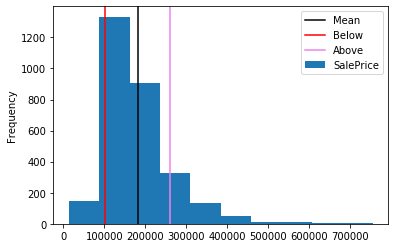

In [38]:
mean = house['SalePrice'].mean()
st_dev = standard_deviation(house['SalePrice'])
house['SalePrice'].plot.hist()
plt.axvline(mean, color='black', label='Mean')
plt.axvline(mean-st_dev, color='Red', label='Below')
plt.axvline(mean+st_dev, color='Violet', label='Above')
plt.legend()
plt.show()

Notice in the histogram that prices can vary around the mean much more or much less than USD 79,873. Some outliers around USD 700,000 are more than USD 500,000 above the mean and a couple of houses around USD 30,000 are more than USD 150,000 below the mean. The standard deviation doesn't set boundaries for the values in a distribution: the prices can go above and below the mean more than USD 79,873.

So we can say that the sample standard deviation underestimates on average the population standard deviation. Some sample standard deviations are lower than the population standard deviation, some are greater, some may even be equal to the population standard deviation, but on average the sample standard deviation is lower than the population standard deviation.

Getting a sample with a higher standard deviation than in the population is possible, but this is less likely. This is mostly specific to samples with a high spread and no clusters.

To correct the underestimation problem, we can try to slightly modify the sample standard deviation formula to return higher values. One way to do that is to decrease the value of the denominator. For instance, in 12/6=2, the denominator is 6. If we decrease the value of the denominator, we get a greater result: 12/4=3.

We'll decrease by 1 the denominator in the sample standard deviation formula, which now becomes:

This small correction we added to the sample standard deviation (dividing by n-1 instead of n) is called **Bessel's correction**. Let's implement Bessel's correction to our standard_deviation() function and repeat the steps in the last exercise to see if Bessel's correction adds any improvements.

**Population standard deviation - lowercase sigma - square root of population variance (mean absolute deviation)**

**Sample standard deviation (with Bessel's correction)     - lowercase s.    - square root of sample varianc**

## Python functions for calculations

In [39]:
st_dev = house['SalePrice'].std(ddof = 1) # default ddof = 1 Be

variance = house['SalePrice'].var(ddof = 1) # default ddof = 1

print('Standard deviation:',st_dev)
print('Variance:',variance)

Standard deviation: 79886.69235666493
Variance: 6381883615.688427


## Z-score

The value representing the number of standard deviations away from the mean is commonly known as the **standard score**, or the **z-score**. We'll use the term "z-score" throughout our courses.

Find out the number of standard deviations away from the mean for a price of USD 220,000 in the distribution of the SalePrice variable.

#### z-score = (x-mean)/sta_dev

In [43]:
mean = house['SalePrice'].mean()
st_dev = house['SalePrice'].std()
z = (220000-mean)/st_dev
z

0.4907443126661111

The z-scores we've dealt with so far were all positive, but we can have negative z-scores as well. Let's consider again one of the samples from the last screen (the one with a mean x-bar (mean sample) of USD 180,000, and a standard deviation s of USD 40,000). A price of USD 100,000 will have a z-score of -2:

z = (100000-180000)/40000 = -2

We can see that a z-score has two parts:

* The sign, which indicates whether the value is above or below the mean.
* The value, which indicates the number of standard deviations that a value is away from the mean.

Generally, the sign of a z-score is written out even if the z-score is positive. If a value is two standard deviations away from the mean, we should write that the z-score is +2, not 2

## Task

Let's now consider an example that's suggestive for the kind of questions we can answer using z-scores.

Let's say we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in (remember that our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and we want to target our investment based on location.

The company budgetedUSD 10,000,000 for this investment, and the plan is to buy 50 houses of USD 200,000 each. Depending on the market particularities of each neighborhood, a USD 200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of USD 200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in a bad neighborhood, and someone can get a high-quality house for USd 200,000, but usually people avoid bad neighborhood nonetheless for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with USD 200,000, you may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

* North Ames.
* College Creek.
* Old Town.
* Edwards.
* Somerset.
Our goal is to find out for which of these neighborhoods a USD 200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a USD 200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

We saw in the previous exercise that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0 (we'll detail later in this mission why the mean of a distribution has a z-score of 0).

Note that we can't simply find the mean sale price of each neighborhood and then just subtract USD 200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.

In [81]:
neigh_list = ['NAmes','CollgCr','OldTown','Edwards','Somerst']
mean_list = []
stdev_list = []
zscore_list =[]
neigh_data = pd.DataFrame()


for n in neigh_list:
    neigh = house[house['Neighborhood']==n]
    mean = neigh['SalePrice'].mean()
    stdev = neigh['SalePrice'].std()
    zscore = (200000-mean)/stdev
    mean_list.append(int(mean))
    stdev_list.append(int(stdev))
    zscore_list.append(zscore)

neigh_data['Name'] = neigh_list
neigh_data['Mean'] = mean_list
neigh_data['St. dev'] = stdev_list
neigh_data['Z-score'] = zscore_list
neigh_data

,Name,Mean,St. dev,Z-score
0,NAmes,145097,31882,1.722020
1,CollgCr,201803,54187,-0.033281
2,OldTown,123991,44327,1.714710
3,Edwards,130843,48030,1.439851
4,Somerst,229707,57437,-0.517212


**It is clear that best investment would be to buy estate around the Cellege Creek**